# Métodos Numéricos (2024)

## Guía 5: 2024-05-07 - Derivadas

In [2]:
using Plots
using LaTeXStrings

## Problema 1


Defina una función, que, dada una función, un punto y un intervalo, retorne una aproximación a la derivada de la función dada, evaluada en el punto dado, utilizando la fórmula de diferencias finitas que se deriva de la siguiente aproximación (*fórmula centrada de tres puntos*): 


$$
f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
$$

Utilize dicha función para evaluar la derivada de la función $f(x) = x e^x$ en el punto $x=2$
para distintos valores de $h$ y calcule el incremento óptimo $h_o$ teniendo en cuenta los errores de truncamiento y redondeo. 
Usando la diferencia entre $f'(2)$ (calculado en Julia usando las funciones matemáticas incorporadas) y el valor de la aproximación mencionada, grafique en escala *log-log* el error versus $h$ para $h = 10^{-k}$ con $k$ entero.

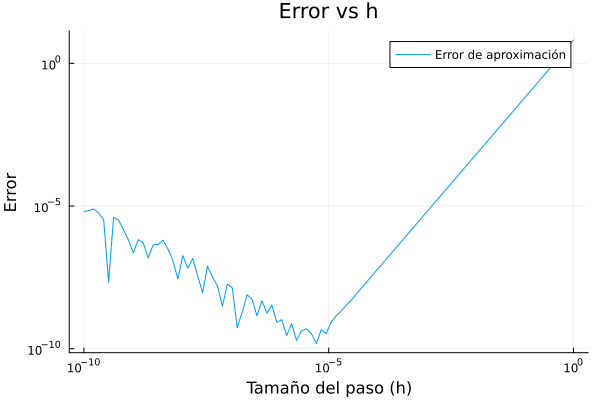

In [31]:
# Definir la función para aproximar la derivada usando diferencias finitas centradas de tres puntos
function aprox_der(f, x, h)
    return (f(x + h) - f(x - h)) / (2 * h)
end

# Función original
f(x) = x*(ℯ^x)

# Punto donde se evalua la derivada
x = 2
# Rango de valores de h
h_values = 10 .^ range(-10, stop=0, length=100)

# Derivada exacta en el punto dado
exact_deri(x) = (ℯ^x)+x*(ℯ^x)

# Calcular el error de la aproximación para diferentes valores de h
errors = [abs(aprox_der(f, 2, h) - exact_deri(2)) for h in h_values]

# Graficar el error versus el tamaño del paso en una escala log-log
plot(h_values, errors, xaxis=:log, yaxis=:log, xlabel="Tamaño del paso (h)", ylabel="Error", title="Error vs h", label="Error de aproximación")



## Problema 2

Para funciones $f(x)$ que son suficientemente diferenciables en $x=c$

1. Muestre que se  puede aproximar $f'(c)$ con la *fórmula centrada de 5 puntos*
$$
D_5f(c) := \,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)
$$


2. Muestre que la aproximación es exacta para polinomios de grado $\le 4$.
*Ayuda:* calcule explícitamente el término expresado como $O(h^4)$ en la ecuación siguiente, usando una expansión en serie de Taylor alrededor de $x=c$ de todas las evaluaciones de la función que aparecen en la fórmula para $D_5f(c)$.

$$
f'(c)\,=\,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)\,+\,O(h^4)
$$

Para demostrar que la fórmula centrada de 5 puntos proporciona una aproximación de $f'(c)$, primero expandiremos $f(c \pm 2h)$ y $f(c \pm h)$ en series de Taylor alrededor de $x = c$. Luego, usaremos estas expansiones en la fórmula dada y mostraremos que el término de error es $O(h^4)$, lo que demuestra que la aproximación es exacta para polinomios de grado $\leq 4$.

1. **Expansión en serie de Taylor:**

Para $f(c \pm 2h)$, usamos la expansión en serie de Taylor alrededor de $x = c$:

$$f(c \pm 2h) = f(c) \pm 2hf'(c) + 2h^2f''(c) \pm \frac{4}{3}h^3f'''(c) + \frac{2}{3}h^4f^{(4)}(c) + O(h^5)$$

Para $f(c \pm h)$, usamos la misma expansión:

$$f(c \pm h) = f(c) \pm hf'(c) + \frac{h^2}{2}f''(c) \pm \frac{h^3}{6}f'''(c) + \frac{h^4}{24}f^{(4)}(c) + O(h^5)$$

2. **Sustitución en la fórmula:**

Usando las expansiones anteriores, podemos reescribir la fórmula centrada de 5 puntos como:

$$D_5f(c) = \frac{1}{12h} \left( \left( f(c) - 2hf'(c) + 2h^2f''(c) - \frac{4}{3}h^3f'''(c) + \frac{2}{3}h^4f^{(4)}(c) \right) - 8 \left( f(c) - hf'(c) + \frac{h^2}{2}f''(c) - \frac{h^3}{6}f'''(c) + \frac{h^4}{24}f^{(4)}(c) \right) \right.$$

$$+ 8 \left( f(c) + hf'(c) + \frac{h^2}{2}f''(c) + \frac{h^3}{6}f'''(c) + \frac{h^4}{24}f^{(4)}(c) \right) - \left. \left( f(c) + 2hf'(c) + 2h^2f''(c) + \frac{4}{3}h^3f'''(c) + \frac{2}{3}h^4f^{(4)}(c) \right) \right)$$

3. **Simplificación:**

Simplificando la expresión anterior, muchos términos se cancelan y obtenemos:

$$D_5f(c) = \frac{1}{12h} \left( - 8hf'(c) + 8hf'(c) + \frac{8h^3}{6}f'''(c) - \frac{8h^3}{6}f'''(c) + \frac{8h^4}{24}f^{(4)}(c) - \frac{8h^4}{24}f^{(4)}(c) \right)$$

$$= \frac{1}{12h} \left( \frac{8h^4}{24}f^{(4)}(c) - \frac{8h^4}{24}f^{(4)}(c) \right) = O(h^4)$$

Esto demuestra que el término de error en la fórmula es $O(h^4)$, lo que implica que la aproximación es exacta para polinomios de grado $\leq 4$.

Por lo tanto, hemos demostrado que la fórmula centrada de 5 puntos proporciona una aproximación exacta para la primera derivada $f'(c)$ para funciones suficientemente diferenciables en $x = c$.


## Problema 3

1. Implemente el cálculo aproximado de las derivadas de una función arbitraria utilizando las fórmulas *i) hacia adelante de 2 puntos*, *ii) centrada de 3 puntos* y *iii) centrada de 5 puntos*.

2. Aplíquelas para obtener los valores aproximados de las derivadas de $f(x)=\cos x$ y $g(x)=e^x$.

3. Haga un gráfico *log-log* del error relativo $E$ vs $h$ para $h\in [\epsilon_m(x),0.1]$ y $x=0.1, 1, 100$. Aquí $\epsilon_m(x)$ es la precisión de la máquina al valor $x$.

4. Verifique si el número de cifras decimales que obtiene coincide con las estimaciones presentadas en el téorico.

5. Identifique las regiones donde domina el error del algoritmo y el error de redondeo, respectivamente. Las pendientes que se observan, corresponden a las predichas en el teórico?

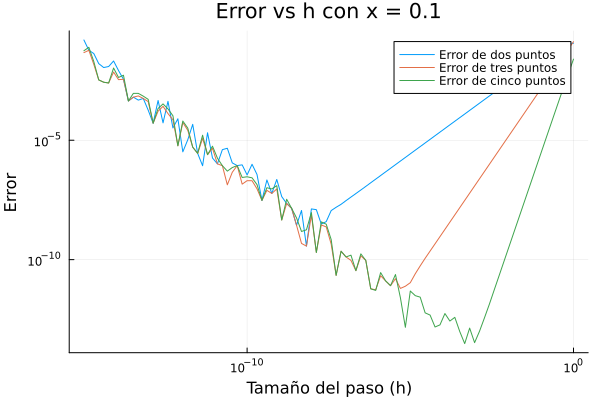

In [89]:
function two_point_derivative(f,x,h)
    return (f(x+h)-f(x))/(h)
end

function three_point_derivative(f,x,h)
    return (f(x+h)-f(x-h))/(2*h)
end 

function five_point_derivative(f,x,h)
    return (f(x-2h)+(8*(-f(x-h)+f(x+h)))-f(x+2h))/(12*h)
end

#Funcion Original
f(x)= cos(x)
g(x) = ℯ^x

# Punto donde se evalua la derivada
x = 1

# Rango de valores de h
h_values = 10 .^ range(-15, stop=0, length=100)

# Derivada exacta en el punto dado
exact_der_f(x) = -sin(x)
exact_der_g(x) = e^x

# Calcular el error de la aproximación para diferentes valores de h
error_2 = [abs(two_point_derivative(f, x, h) - exact_der_f(x)) for h in h_values]
error_3 = [abs(three_point_derivative(f, x, h) - exact_der_f(x)) for h in h_values]
error_5 = [abs(five_point_derivative(f, x, h) - exact_der_f(x)) for h in h_values]
# Graficar el error versus el tamaño del paso en una escala log-log
plot(h_values, error_2, xaxis=:log, yaxis=:log, xlabel="Tamaño del paso (h)", ylabel="Error", 
    title="Error vs h con x = 0.1", label="Error de dos puntos")
plot!(h_values, error_3, xaxis=:log, yaxis=:log, label="Error de tres puntos")
plot!(h_values, error_5, xaxis=:log, yaxis=:log, label="Error de cinco puntos")

## Problema 4

En el archivo `pos.dat` que se encuentra en el repositorio se dispone de un conjunto de datos experimentales de la posición de un móvil que se desplaza en línea recta. El mismo tiene dos columnas, siendo la primera el tiempo de la medición, $t_i$ y la segunda la posición, $x(t_i)$.

1. Escriba un programa que lea los datos del archivo y calcule la velocidad del móvil para los mismos tiempos, $t_i$. Utilice la fórmula de 3 puntos. Preste especial atención a los puntos de los bordes del intervalo.
2. Repita el punto 1. utilizando las fórmulas de 5 puntos.

**Ayuda:** Para bajar el archivo `pos.dat` del repositorio de github desde julia realice:

In [63]:
# Ejemplo de como bajar un archivo.
#separador = "/" # En Linux
separador = "\\"  #En Windows
download(
    "https://raw.githubusercontent.com/reula/Metodos_Numericos_2022/main/Guias/pos.dat", # Bajamos el archivo pos.dat del repositorio en el que están las guías.
    pwd() * separador * "pos.dat" # Guardamos lo bajado en un archivo llamado pos.dat en el directorio local.
)

"C:\\Users\\mgg15\\gomez-martin\\metodos-numericos-2024\\pos.dat"

1. **Notar que Windows usa `"\"` en vez de `"/"`.**

2. Cuando entre a github a ver los links a los archivos, seleccione primero el archivo, cuando se visualice selecione el botón **Raw**. Fíjese que el link debe comenzar con https://raw.githubusercontent.com

**Ayuda:** Para cargar los datos en `pos.dat` a vectores de Julia utilice:

In [64]:
t = Vector{Float64}()
x = Vector{Float64}()
open("pos.dat","r") do fh
    for line in readlines(fh) 
        cols = split(line)
        push!(t,parse(Float64,cols[1]))
        push!(x,parse(Float64,cols[2]))
    end
end

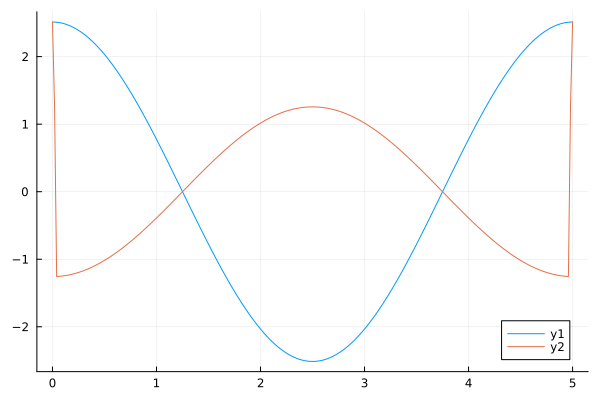

In [88]:
# Función para calcular la velocidad usando la fórmula de 3 puntos
function velocidad_3_puntos(x, t, indice)
    if indice == 1
        return (x[indice+1] - x[indice]) / (t[indice+1] - t[indice])
    elseif indice == length(t)
        return (x[indice] - x[indice-1]) / (t[indice] - t[indice-1])
    else
        return (x[indice+1] - x[indice-1]) / (t[indice+1] - t[indice-1])
    end
end

# Función para calcular la velocidad usando la fórmula de 5 puntos
function velocidad_5_puntos(x, t, indice)
    if indice == 1
        return (-25*x[indice] + 48*x[indice+1] - 36*x[indice+2] + 16*x[indice+3] - 3*x[indice+4]) / (12*(t[indice+1] - t[indice]))
    elseif indice == 2
        return (-3*x[indice-1] - 10*x[indice] + 18*x[indice+1] - 6*x[indice+2] + x[indice+3]) / (12*(t[indice+1] - t[indice-1]))
    elseif indice == length(t)-1
        return (3*x[indice+1] + 10*x[indice] - 18*x[indice-1] + 6*x[indice-2] - x[indice-3]) / (12*(t[indice] - t[indice-2]))
    elseif indice == length(t)
        return (25*x[indice] - 48*x[indice-1] + 36*x[indice-2] - 16*x[indice-3] + 3*x[indice-4]) / (12*(t[indice] - t[indice-1]))
    else
        return (-x[indice-2] + 8*x[indice-1] - 8*x[indice+1] + x[indice+2]) / (12*(t[indice+1] - t[indice-1]))
    end
end

# Función principal para leer el archivo y calcular la velocidad
function calcular_velocidad(x,t)
    # Inicialización de arreglos para almacenar velocidades
    velocidades_3_puntos = similar(x)
    velocidades_5_puntos = similar(x)

    # Cálculo de velocidades usando la fórmula de 3 puntos
    for i in 1:length(t)
        velocidades_3_puntos[i] = velocidad_3_puntos(x, t, i)
    end

    # Cálculo de velocidades usando la fórmula de 5 puntos
    for i in 1:length(t)
        velocidades_5_puntos[i] = velocidad_5_puntos(x, t, i)
    end

    return t, velocidades_3_puntos, velocidades_5_puntos
end

# Llamada a la función principal
t, velocidades_3_puntos, velocidades_5_puntos = calcular_velocidad(x,t)

plot(t,velocidades_3_puntos)
plot!(t,velocidades_5_puntos)

# Ejercicios Complementarios

## Problema C.1

**Derivada segunda:** Deduzca la fórmula centrada equiespaciada de tres puntos para la derivada segunda $f''(x_0)$. Incluya una cota para el error absoluto.

## Problema C.2

**Interpolación y diferenciación:** Se conoce el valor de $f(x)$ en tres puntos $x_0,x_1,x_2$. Escriba el polinomio interpolante $P_2(x)$ en la forma de Lagrange. Asuma que aproximamos $f'(x_i)$ por $P_2'(x_i)$,

1. Muestre que si tomamos $x_0=c-h,\,x_1=c,\,x_2=c+h$ obtenemos la expresión del algoritmo centrado de tres
puntos para $f'(c)$. 
2. Muestre que, en general, esta proximación arroja el algoritmo de tres puntos. Reobtenga la fórmula dada en el teórico para $x_0=c-h_1,\,x_1=c,\,x_2=c+h_2$. Obtenga una expresión para las derivadas en extremos del intervalo $[a,b]$, $f'(a)$ con $x_0=a,\,x_1=a+h,\,x_2=a+2 h$ y $f'(b)$ con $x_0=b,\,x_1=b-h,\,x_2=b-2h$.
3. Generalice a 5 puntos y re-obtenga el algoritmo centrado y equiespaciado en este caso.